In [166]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn import model_selection

In [87]:
def build_stat(X,set_):
    Y=[]
    stat=[]
    for idx in X:
        Y+=[random.choice(set_)]
        stat+=[len([i for i in Y if i==0])/idx]
    return stat

def print_stat(X,set_):
    fig, ax = plt.subplots()
    ax.plot(X,build_stat(X,set_),X,build_stat(X,set_),X,build_stat(X,set_),X,build_stat(X,set_),X,build_stat(X,set_),X,build_stat(X,set_))
    plt.show() 


In [80]:
set_=[0,0,0,0,0,0,0,0,1,1,1,1,1]

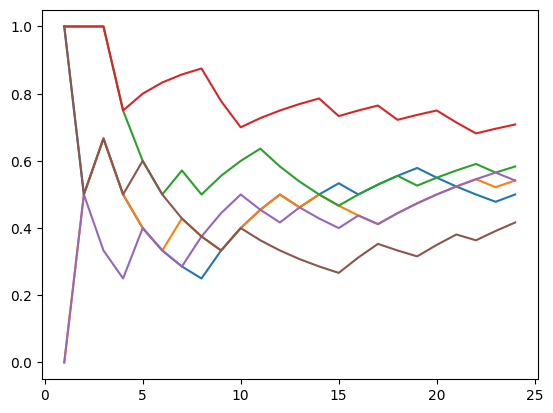

In [81]:
X=[i for i in range(1,25)]
print_stat(X,set_)   

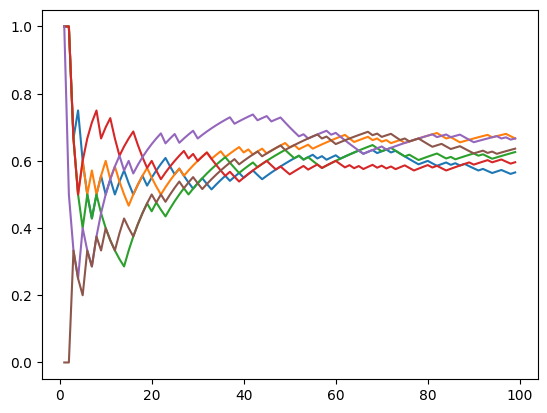

In [82]:
X=[i for i in range(1,100)]
print_stat(X,set_)

In [133]:
iris= pd.read_csv('iris.data',sep=',') #https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris_df = pd.DataFrame(np.array(iris),columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

X=np.array([iris_df.sepal_length, iris_df.sepal_width, iris_df.petal_length, iris_df.petal_width]).T
Y=np.array(iris_df.species)
X_train, X_test, Y_train, Y_test=model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)


print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)

print("Y_train.shape", Y_train.shape)
print("Y_test.shape", Y_test.shape)

np.unique(Y_train)


X_train.shape (99, 4)
X_test.shape (50, 4)
Y_train.shape (99,)
Y_test.shape (50,)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [149]:
clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=3,bootstrap=True,n_jobs=-1,oob_score=True)
clf.fit(X_train,Y_train)
clf.oob_score_

0.9696969696969697

In [150]:
Y_predict=clf.predict(X_test)

print(sklearn.metrics.confusion_matrix(Y_test,Y_predict))
print(sklearn.metrics.accuracy_score(Y_test,Y_predict))
clf.oob_decision_function_

[[19  0  0]
 [ 0 12  3]
 [ 0  2 14]]
0.9


array([[0.12164948, 0.58969072, 0.28865979],
       [0.07660455, 0.32298137, 0.60041408],
       [0.12190083, 0.59917355, 0.27892562],
       [0.57142857, 0.31836735, 0.11020408],
       [0.08731809, 0.43451143, 0.47817048],
       [0.06300813, 0.59349593, 0.34349593],
       [0.60288066, 0.2962963 , 0.10082305],
       [0.52390852, 0.37422037, 0.1018711 ],
       [0.56967213, 0.31967213, 0.11065574],
       [0.09710744, 0.53305785, 0.36983471],
       [0.0625    , 0.46666667, 0.47083333],
       [0.56404959, 0.32438017, 0.11157025],
       [0.62398374, 0.29268293, 0.08333333],
       [0.61825726, 0.2966805 , 0.08506224],
       [0.10677618, 0.61601643, 0.27720739],
       [0.61825726, 0.29875519, 0.08298755],
       [0.12576065, 0.57403651, 0.30020284],
       [0.09751037, 0.30912863, 0.593361  ],
       [0.59259259, 0.3127572 , 0.09465021],
       [0.08247423, 0.57525773, 0.34226804],
       [0.09278351, 0.44742268, 0.45979381],
       [0.58884298, 0.30578512, 0.1053719 ],
       [0.

In [159]:
clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=10,n_jobs=-1)
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test,Y_predict))

[[19  0  0]
 [ 0 12  3]
 [ 0  1 15]]


In [175]:
clf=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,algorithm="SAMME.R", learning_rate=0.5)
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test,Y_predict))

[[19  0  0]
 [ 0 12  3]
 [ 0  1 15]]
